In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

import warnings
warnings.filterwarnings('ignore')

<h1 style='color:blue'> INTRODUCTION </H1>

#### About Data:  

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Goal:  

The classification goal is to predict if the client will subscribe to a term deposit (variable y)

<H1 style='color:blue'> IMPORTING DATA </H1>

In [2]:
data=pd.read_excel("d:\\Users\\NAME\\Desktop\\INNOMATICS\\PROJECTS AND ASSIGNMENTS\\Statistics\\Data.xlsx")

In [3]:
data.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no
3,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no
4,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no


<h4 style ='color : purple'> - The above dataframe has the column headers in row 3, so selecting the column headers to be row 3. </h4>
    <h4 style ='color : purple'> - Demonstrating different methods </h4>

#### Method 1: 
   * Use header in data import method

In [4]:
df=pd.read_excel("d:\\Users\\NAME\\Desktop\\INNOMATICS\\PROJECTS AND ASSIGNMENTS\\Statistics\\Data.xlsx",header=2)

In [5]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,cellular,17.0,"nov, 2017",16.2833333333333 min,3.0,-1.0,0.0,unknown,yes
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,cellular,17.0,"nov, 2017",7.6 min,2.0,-1.0,0.0,unknown,yes
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,cellular,17.0,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,telephone,17.0,"nov, 2017",8.46666666666667 min,4.0,-1.0,0.0,unknown,no


#### Method 2: 
   * Use skiprows in data import method

In [6]:
df1=pd.read_excel("d:\\Users\\NAME\\Desktop\\INNOMATICS\\PROJECTS AND ASSIGNMENTS\\Statistics\\Data.xlsx",skiprows=2)

In [7]:
df1.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no


In [8]:
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no


In [9]:
df.shape

(45211, 19)

In [10]:
df.describe()

,customerid,age,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  float64
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  float64
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  float64
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  float64
 15  pdays       45211 non-null  float64
 16  previous    45211 non-null  float64
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(7), object(12)

In [12]:
# Checking the object data columns
df.select_dtypes('object')

,salary,marital,jobedu,targeted,default,housing,loan,contact,month,duration,poutcome,response
0,100000.0,married,"management,tertiary",yes,no,yes,no,unknown,"may, 2017",261 sec,unknown,no
1,60000.0,single,"technician,secondary",yes,no,yes,no,unknown,"may, 2017",151 sec,unknown,no
2,120000.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,"may, 2017",76 sec,unknown,no
3,20000.0,married,"blue-collar,unknown",no,no,yes,no,unknown,"may, 2017",92 sec,unknown,no
4,0.0,single,"unknown,unknown",no,no,no,no,unknown,"may, 2017",198 sec,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,60000.0,married,"technician,tertiary",yes,no,no,no,cellular,"nov, 2017",16.2833333333333 min,unknown,yes
45207,55000.0,divorced,"retired,primary",yes,no,no,no,cellular,"nov, 2017",7.6 min,unknown,yes
45208,55000.0,married,"retired,secondary",yes,no,no,no,cellular,"nov, 2017",18.7833333333333 min,success,yes
45209,20000.0,married,"blue-collar,secondary",yes,no,no,no,telephone,"nov, 2017",8.46666666666667 min,unknown,no


<H1 style='color: blue'> CLEANING DATA </H1>

##### Coverting data type of salary column to numeric 

In [13]:
df['salary'].nunique()

12

In [14]:
df['salary'].isnull().sum()

0

In [15]:
df['salary'].value_counts()

20000.0     9732
100000.0    9458
60000.0     9176
50000.0     5171
70000.0     4154
55000.0     2264
120000.0    1487
8000.0      1303
16000.0     1240
4000.0       938
0.0          226
?             62
Name: salary, dtype: int64

###### - The above data shows that salary column has 62 null values. Replacing them with np.NAN

In [16]:
df['salary']=np.where(df['salary']=='?', np.NaN, df['salary'])

In [17]:
df['salary'].value_counts()

20000.0     9732
100000.0    9458
60000.0     9176
50000.0     5171
70000.0     4154
55000.0     2264
120000.0    1487
8000.0      1303
16000.0     1240
4000.0       938
0.0          226
Name: salary, dtype: int64

In [18]:
df['salary'].nunique()

11

In [19]:
df['salary']=df['salary'].astype('float')

In [20]:
df['salary'].dtype

dtype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  float64
 1   age         45191 non-null  float64
 2   salary      45149 non-null  float64
 3   balance     45211 non-null  float64
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  float64
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  float64
 15  pdays       45211 non-null  float64
 16  previous    45211 non-null  float64
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(8), object(11)

##### Creating new columns by splitting data in the jobedu column

In [22]:
df['job']=df['jobedu'].apply(lambda x: x.split(',')[0])
df['edu']=df['jobedu'].apply(lambda x: x.split(',')[1])

In [23]:
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no,management,tertiary
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no,technician,secondary
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no,entrepreneur,secondary
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no,blue-collar,unknown
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no,unknown,unknown


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  float64
 1   age         45191 non-null  float64
 2   salary      45149 non-null  float64
 3   balance     45211 non-null  float64
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  float64
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  float64
 15  pdays       45211 non-null  float64
 16  previous    45211 non-null  float64
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job         45211 non-nul

### Filling the Null Values:
- Numerical Variable: Fill with mean or median.
- Categorical Variable: Fill Mode
- Domain knowledge

**- Filling null values in Age column with median**

In [25]:
df['age'].isnull().sum()

20

Filling the null values with the median

In [26]:
m=df['age'].median()
m

39.0

In [27]:
df['age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [28]:
df['age']=df['age'].fillna(m)

In [29]:
df['age'].isnull().sum()

0

<AxesSubplot:xlabel='age'>

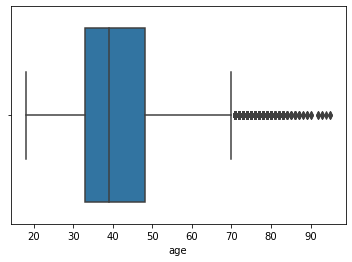

In [30]:
sns.boxplot(df['age'])

In [31]:
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no,management,tertiary
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no,technician,secondary
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no,entrepreneur,secondary
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no,blue-collar,unknown
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no,unknown,unknown


**- Filling the null values in salary column with 0**


In [32]:
df['salary'].fillna(0)

0        100000.0
1         60000.0
2        120000.0
3         20000.0
4             0.0
           ...   
45206     60000.0
45207     55000.0
45208     55000.0
45209     20000.0
45210    120000.0
Name: salary, Length: 45211, dtype: float64

In [33]:
df.groupby(['job','poutcome'])['customerid'].count()

job            poutcome
admin.         failure      643
               other        241
               success      204
               unknown     4083
blue-collar    failure     1068
               other        401
               success      148
               unknown     8115
entrepreneur   failure      164
               other         39
               success       22
               unknown     1262
housemaid      failure       97
               other         26
               success       29
               unknown     1088
management     failure     1044
               other        393
               success      387
               unknown     7634
retired        failure      230
               other         83
               success      174
               unknown     1777
self-employed  failure      165
               other         61
               success       55
               unknown     1298
services       failure      444
               other        177
               s

In [34]:
df.groupby('poutcome')['customerid'].count()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: customerid, dtype: int64

##### The above groupby concludes that there were 1511 confirmed successes out of the total calls made to customers.

In [35]:
df['month'].value_counts(sort=True,ascending=False)

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

**- Filling the null values in month column with the mode**

In [36]:
df['month'].isnull().sum()

50

In [37]:
m1=df['month'].mode()[0]
m1

'may, 2017'

In [38]:
df['month']=df['month'].fillna(m1)

In [39]:
df['month'].isnull().sum()

0

In [40]:
df['month']

0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45211, dtype: object

In [41]:
#sns.boxplot(df['month'])

##### Response variable is a dependent variable

In [42]:
df['response']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45211, dtype: object

In [43]:
df['response'].value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [44]:
df['response'].isnull().sum()

30

In [45]:
df['response'].dropna(inplace = True)

In [46]:
df['response'].isnull().sum()

30

In [47]:
df['response'].describe()

count     45181
unique        2
top          no
freq      39894
Name: response, dtype: object

<AxesSubplot:xlabel='response', ylabel='count'>

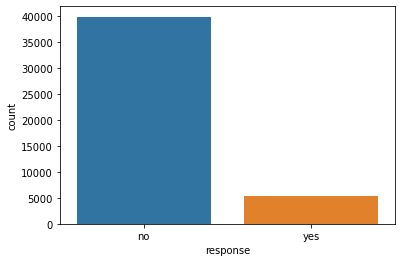

In [48]:
sns.countplot(df['response'])

##### The above plot shows majority of the clients give no response

In [49]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome', ylabel='count'>

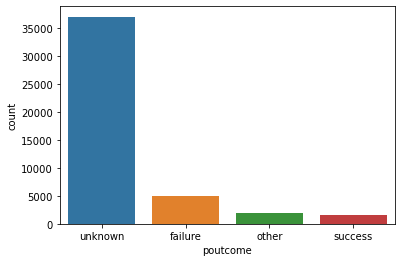

In [50]:
sns.countplot(df['poutcome'])

In [51]:
a=pd.DataFrame(df.groupby(['job','response'])['response'].count())
a

response
job           response          
admin.        no            4536
              yes            630
blue-collar   no            9019
              yes            708
entrepreneur  no            1363
              yes            123
housemaid     no            1130
              yes            109
management    no            8153
              yes           1301
retired       no            1747
              yes            516
self-employed no            1389
              yes            186
services      no            3781
              yes            369
student       no             669
              yes            269
technician    no            6752
              yes            840
unemployed    no            1101
              yes            202
unknown       no             254
              yes             34

In [52]:
df.select_dtypes('number')

,customerid,age,salary,balance,day,campaign,pdays,previous
0,1.0,58.0,100000.0,2143.0,5.0,1.0,-1.0,0.0
1,2.0,44.0,60000.0,29.0,5.0,1.0,-1.0,0.0
2,3.0,33.0,120000.0,2.0,5.0,1.0,-1.0,0.0
3,4.0,47.0,20000.0,1506.0,5.0,1.0,-1.0,0.0
4,5.0,33.0,0.0,1.0,5.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,17.0,3.0,-1.0,0.0
45207,45208.0,71.0,55000.0,1729.0,17.0,2.0,-1.0,0.0
45208,45209.0,72.0,55000.0,5715.0,17.0,5.0,184.0,3.0
45209,45210.0,57.0,20000.0,668.0,17.0,4.0,-1.0,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

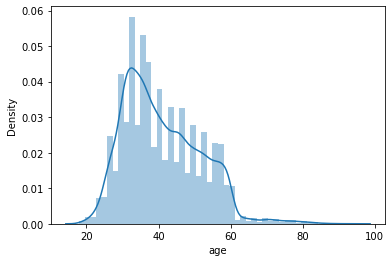

In [53]:
sns.distplot(df.age)

**- Checking the duration column**

In [54]:
df['duration']

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45211, dtype: object

*- The above data shows that the time is not in a consistent format. changing each value into minutes*

In [55]:
df['duration'][0].split()[0]

'261'

In [56]:
float(df['duration'][0].split()[0])

261.0

In [57]:
dur=[]
for val in df['duration']:
    if 'sec' in val:
        dur.append(float(df['duration'][0].split()[0])/60)
    else:
        dur.append(float(df['duration'][0].split()[0]))
df['duration']=dur

In [58]:
df['duration']=np.round(df['duration'],2)
df['duration']

0          4.35
1          4.35
2          4.35
3          4.35
4          4.35
          ...  
45206    261.00
45207    261.00
45208    261.00
45209    261.00
45210    261.00
Name: duration, Length: 45211, dtype: float64

In [59]:
np.round(df['duration'].describe(),2)

count    45211.00
mean       180.87
std        118.93
min          4.35
25%          4.35
50%        261.00
75%        261.00
max        261.00
Name: duration, dtype: float64

<H1 style= 'color: blue'>Exploratory Data Analysis: </H1>

- **Univariate Analysis (Analysis for single column)**
- **Bi-variate Analysis (Analysis about two columns)**
- **Multi-variate Analysis (Analysis about more the than two columns)**

In [60]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,management,tertiary
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,technician,secondary
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,entrepreneur,secondary
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,blue-collar,unknown
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,unknown,unknown


#### - **Univariate Analysis (Analysis for single column)**
- Analysing single columns separately.
- Trying to see their distribution and getting insights from them.
- Identifying and treating outliers
- Selecting the below important columns:
    - 1. salary
    - 2. marital
    - 3. job
    - 4. duration
    - 5. response

In [61]:
df.describe()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45149.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.934795,57084.453698,1362.272058,15.806419,180.873156,2.763841,40.197828,0.580323
std,13051.435847,10.616926,32038.075304,3044.765829,8.322476,118.930889,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,4.350000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,4.350000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,261.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,261.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,261.000000,63.000000,871.000000,275.000000


In [62]:
df['salary'].describe()

count     45149.000000
mean      57084.453698
std       32038.075304
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary', ylabel='Density'>

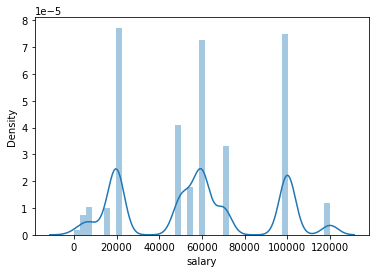

In [63]:
sns.distplot(df['salary'])

<AxesSubplot:xlabel='salary'>

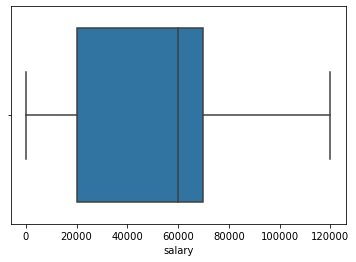

In [64]:
sns.boxplot(df['salary'])

- The above box plot shows that the majority of the customers have their salary in the range of 20k to 70k
- Most common salaries are 20k, 60k and 100k as can be concluded from the above distribution plot

In [65]:
df['marital'].describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

<AxesSubplot:xlabel='marital', ylabel='count'>

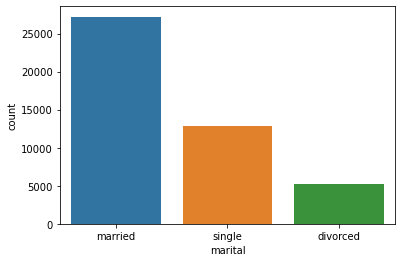

In [66]:
sns.countplot(df['marital'])

In [67]:
a=pd.DataFrame(df.groupby('marital')['customerid'].count())
a

,customerid
marital,
divorced,5207
married,27214
single,12790


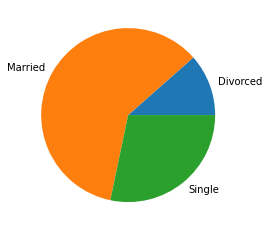

In [68]:
plt.pie(a['customerid'], labels=['Divorced','Married','Single'])
plt.show()

- The above plots show that majority of the customers called are married

In [69]:
df['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

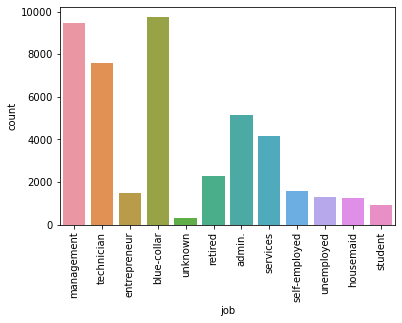

In [70]:
sns.countplot(df['job'])
plt.xticks(rotation=90)
plt.show()

In [71]:
df['job'].nunique()

12

In [72]:
df.groupby('job')['customerid'].count().sort_values(ascending=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: customerid, dtype: int64

- The above plot and data shows that the customers are mostly Blue-collar job holders followed by management job roles.

In [73]:
df['duration'].describe()

count    45211.000000
mean       180.873156
std        118.930889
min          4.350000
25%          4.350000
50%        261.000000
75%        261.000000
max        261.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

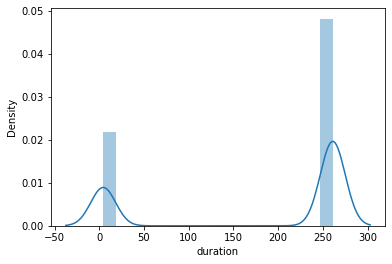

In [74]:
sns.distplot(df['duration'])

<AxesSubplot:xlabel='duration', ylabel='Count'>

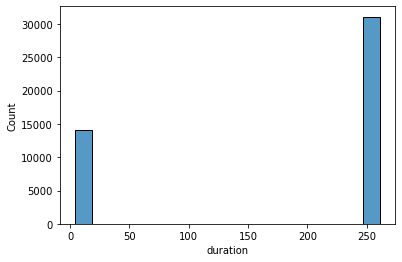

In [75]:
sns.histplot(df['duration'])

- The above plots show that the calls are either short duration calls like around 0-50 mins or long duration calls around 250mins

In [76]:
df['response'].describe()

count     45181
unique        2
top          no
freq      39894
Name: response, dtype: object

In [77]:
df.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='count'>

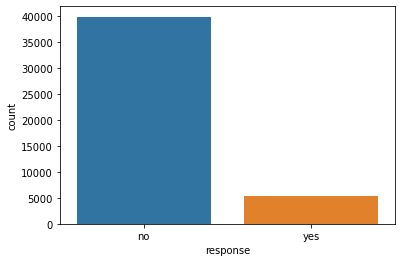

In [78]:
sns.countplot(df['response'])

- The above plot shows that majority of the customer's response was No

- ***Demonstrating Binning***

In [79]:
pd.cut(df['duration'],[0,5,10,20,30,50,70,80,90,200,250,300]).value_counts()

(250, 300]    31096
(0, 5]        14115
(5, 10]           0
(10, 20]          0
(20, 30]          0
(30, 50]          0
(50, 70]          0
(70, 80]          0
(80, 90]          0
(90, 200]         0
(200, 250]        0
Name: duration, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

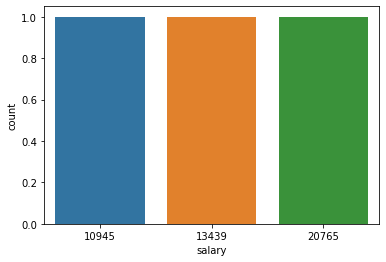

In [80]:
sns.countplot(pd.cut(df['salary'],3, labels=['low','medium','high']).value_counts())

In [81]:
a=pd.DataFrame(pd.cut(df['salary'],3, labels=['low','medium','high']).value_counts())
a.reset_index(inplace=True)
a

,index,salary
0,medium,20765
1,low,13439
2,high,10945


In [82]:
a.rename(columns={'index':'Range'}, inplace=True)
a

,Range,salary
0,medium,20765
1,low,13439
2,high,10945


<AxesSubplot:xlabel='Range', ylabel='count'>

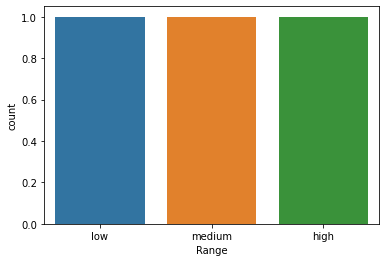

In [83]:
sns.countplot(a['Range'])

**- Finding the numeric and non-numeric columns and separating into two lists**

In [84]:
df_num=df.select_dtypes('number')
df_cat=df.select_dtypes('object')

In [85]:
df_num.columns

Index(['customerid', 'age', 'salary', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')

In [86]:
df_cat.columns

Index(['marital', 'jobedu', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'response', 'job', 'edu'],
      dtype='object')

###  Creating interactive plots

In [87]:
from ipywidgets import interact, interact_manual

- **Using the interact and interact_manual packages we are creating interactive plots as follows:**

In [88]:
@interact_manual
def hist_plot(col = df_num.columns):
    sns.histplot(df[col])

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'day', 'd…

- The above plot shows that the customer ages range majorly from 20 to 60 years

In [89]:
@interact_manual
def distplot(col=df_num.columns):
    sns.distplot(df[col])

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'day', 'd…

- The above plots shows that saaries are mainly around 20k, 60k and 100k

In [90]:
@interact
def boxplot(col=df_num.columns):
    sns.boxplot(df[col])

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'day', 'd…

- The above plot for age shows that the age of the customers are mainly concentrated between 30-50 years

In [91]:
@interact
def countplot(col=df_cat.columns):
    sns.countplot(df[col])

interactive(children=(Dropdown(description='col', options=('marital', 'jobedu', 'targeted', 'default', 'housin…

- The above plot shows that majority of the customers do not apply for loan

#### - **Bivariate Analysis (Analysis of two columns)**
- Analysing two columns together.
- Trying to see how they vary and getting insights from them.

- Checking how the response is dependent based on different factors like call duration, marital status, age, job etc.

In [92]:
df.groupby('response')['duration'].agg({'min','mean','median','max'})

,max,mean,median,min
response,,,,
no,261.0,173.815942,261.0,4.35
yes,261.0,234.155391,261.0,4.35


- *The above shows that the calls with longer duration are generally having a positive response*

In [93]:
@interact
def grouping(col1 = df_cat.columns,
            col2 = df_num.columns):
    return df.groupby(col1)[col2].agg({'min','mean','median','max'})

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

In [94]:
@interact_manual
def plotting(col1=df_cat.columns,col2=df_num.columns):
    sns.boxplot(df[col1],df[col2])
    plt.xticks(rotation=90)

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

- *The above example shows that divorced people have a higher range of salary when compared to others.*


In [95]:
@interact
def plotting_1(col1=df_cat.columns, col2=df_num.columns, col3='response'):
    sns.barplot(df[col1],df[col2],hue= df[col3])

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

- *The above plot shows that married people and divorced people have a higher positive response rate*

In [96]:
@interact
def plotting_1(col1=df_cat.columns, col2=df_num.columns, col3='response'):
    sns.boxplot(df[col1],df[col2],hue= df[col3])

interactive(children=(Dropdown(description='col1', options=('marital', 'jobedu', 'targeted', 'default', 'housi…

- *The above plot shows that the people who have no Loans have given a higher positive response, the age ranges 30-50*

<H1 style= 'color: blue'> DESCRIPTIVE STATISTICS </H1>

### Measures of Central Tendency
   - Mean
   - Median
   - Mode

### Measures of Dispersion
   - Range (Max-Min values)
   - Standard Deviation (Root mean squared error)
   - Variance (mean squared error)

In [97]:
avg_salary = df['salary'].mean()
avg_salary

57084.45369775632

In [98]:
mode_job = df['job'].mode()
mode_job

0    blue-collar
Name: job, dtype: object

In [99]:
df.describe(include= 'all')

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
count,45211.000000,45211.000000,45149.000000,45211.000000,45211,45211,45211,45211,45211,45211,...,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45181,45211,45211
unique,NaN,NaN,NaN,NaN,3,48,2,2,2,2,...,NaN,12,NaN,NaN,NaN,NaN,4,2,12,4
top,NaN,NaN,NaN,NaN,married,"management,tertiary",yes,no,yes,no,...,NaN,"may, 2017",NaN,NaN,NaN,NaN,unknown,no,blue-collar,secondary
freq,NaN,NaN,NaN,NaN,27214,7801,37091,44396,25130,37967,...,NaN,13797,NaN,NaN,NaN,NaN,36959,39894,9732,23202
mean,22606.000000,40.934795,57084.453698,1362.272058,NaN,NaN,NaN,NaN,NaN,NaN,...,15.806419,NaN,180.873156,2.763841,40.197828,0.580323,NaN,NaN,NaN,NaN
std,13051.435847,10.616926,32038.075304,3044.765829,NaN,NaN,NaN,NaN,NaN,NaN,...,8.322476,NaN,118.930889,3.098021,100.128746,2.303441,NaN,NaN,NaN,NaN
min,1.000000,18.000000,0.000000,-8019.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,4.350000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN
25%,11303.500000,33.000000,20000.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,4.350000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN
50%,22606.000000,39.000000,60000.000000,448.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,16.000000,NaN,261.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN
75%,33908.500000,48.000000,70000.000000,1428.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,21.000000,NaN,261.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN


- **The above table gives the statistical summary of all the columns in the data frame**

### Measure of Shape
   - SKEWNESS:
         1. Positive Skewness:  [ mean > median ;  skew > 0.5 ] 
             
         2. Negative Skewness:  [ mean < median ;  skew < -0.5 ]
             
         3. Symmetric Skewness: [ mean ~= median ; -0.5 < skew < 0.5 ] (Normal Curve)

In [100]:
df['salary'].skew()

0.13904080905510885

In [101]:
np.round(df['salary'].skew(),2)

0.14

<AxesSubplot:xlabel='salary', ylabel='Density'>

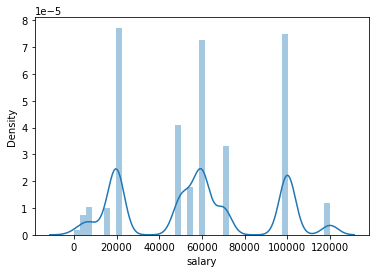

In [102]:
sns.distplot(df['salary'])

<AxesSubplot:xlabel='salary'>

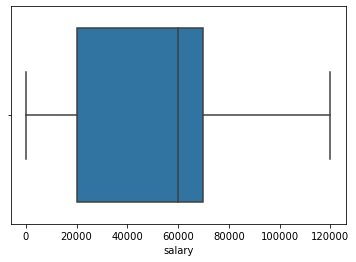

In [103]:
sns.boxplot(df['salary'])

In [104]:
df['salary'].mean()

57084.45369775632

In [105]:
df['salary'].median()

60000.0

- **Salary has a symmetric skewness**

## Checking Outliers

##### Inter Quartile Range:
- q1 = Lower Quartile = 25th percentile
- q2 = Median         = 50th percentile
- q3 = Upper Quartile = 75th percentile
- iqr = q3 - q1
- Lower bound = q1 - (1.5 * iqr)
- Upper bound = q3 + (1.5 * iqr)

In [106]:
def outlier_iqr(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1

    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)

    outliers=data[(data[col] < lb) | (data[col] > ub)][col]
    print('Lower Quartile: ', q1)
    print('Upper Quartile: ', q3)
    print('Inter Quartile Range:' , iqr)
    print('Lower bound: ', lb)
    print('Upper bound: ', ub)
    print('No. of Outliers: ', len(outliers))
    print('Skewness is: ', data[col].skew())
    print('Max value: ', data[col].max())
    print('Min value: ', data[col].min())

for val in df.select_dtypes('number').columns:
    print('Column Name is: ', str.upper(val))
    outlier_iqr(df,val)
    print('=================================')

Column Name is:  CUSTOMERID
Lower Quartile:  11303.5
Upper Quartile:  33908.5
Inter Quartile Range: 22605.0
Lower bound:  -22604.0
Upper bound:  67816.0
No. of Outliers:  0
Skewness is:  0.0
Max value:  45211.0
Min value:  1.0
Column Name is:  AGE
Lower Quartile:  33.0
Upper Quartile:  48.0
Inter Quartile Range: 15.0
Lower bound:  10.5
Upper bound:  70.5
No. of Outliers:  487
Skewness is:  0.6853771512669647
Max value:  95.0
Min value:  18.0
Column Name is:  SALARY
Lower Quartile:  20000.0
Upper Quartile:  70000.0
Inter Quartile Range: 50000.0
Lower bound:  -55000.0
Upper bound:  145000.0
No. of Outliers:  0
Skewness is:  0.13904080905510885
Max value:  120000.0
Min value:  0.0
Column Name is:  BALANCE
Lower Quartile:  72.0
Upper Quartile:  1428.0
Inter Quartile Range: 1356.0
Lower bound:  -1962.0
Upper bound:  3462.0
No. of Outliers:  4729
Skewness is:  8.360308326166326
Max value:  102127.0
Min value:  -8019.0
Column Name is:  DAY
Lower Quartile:  8.0
Upper Quartile:  21.0
Inter Quar

### Measures of relation

#### Correlation:
   - Relationship b/w two variables is called correlation.
   - Types of correlation:
       1. Possitive Correlation (correlation is in b/w 0.5 to 1)     [0.5 < corr() < 1]
       2. Negative Correlation  (correlation is in b/w -0.5 to -1)   [-0.5 < corr() < -1]
       3. No relation           (correlation is in b/w -0.5 to 0.5)  [-0.5 < corr() < 0.5]

**1.	*Find the correlation between the columns and draw the observations from it*.**

In [107]:
df.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
customerid,1.000000,0.014922,0.040025,0.073639,-0.061465,0.802619,-0.102884,0.437729,0.271098
age,0.014922,1.000000,0.026259,0.097753,-0.009185,0.017357,0.004851,-0.023795,0.001302
salary,0.040025,0.026259,1.000000,0.056423,0.027710,0.097384,0.015314,-0.015569,0.014187
balance,0.073639,0.097753,0.056423,1.000000,0.004503,0.050401,-0.014578,0.003435,0.016674
day,-0.061465,-0.009185,0.027710,0.004503,1.000000,0.093673,0.162490,-0.093044,-0.051710
duration,0.802619,0.017357,0.097384,0.050401,0.093673,1.000000,-0.003334,0.277210,0.169741
campaign,-0.102884,0.004851,0.015314,-0.014578,0.162490,-0.003334,1.000000,-0.088628,-0.032855
pdays,0.437729,-0.023795,-0.015569,0.003435,-0.093044,0.277210,-0.088628,1.000000,0.454820
previous,0.271098,0.001302,0.014187,0.016674,-0.051710,0.169741,-0.032855,0.454820,1.000000


<AxesSubplot:>

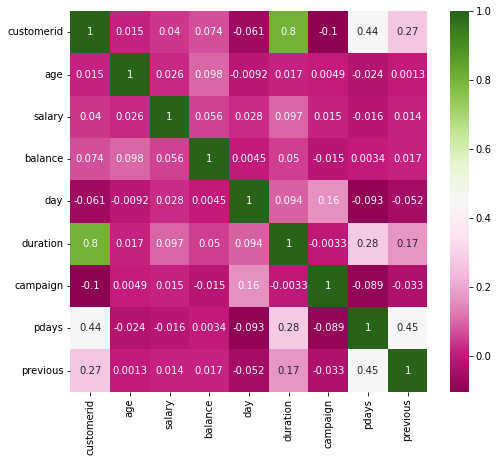

In [108]:
# Using a heatmap to visualize the correlation bw the variables
plt.figure(figsize=(8,7))
sns.set_palette("tab10")

sns.heatmap(df.corr(),annot=True,cmap="PiYG")

In [109]:
df.corr().unstack()

customerid  customerid    1.000000
            age           0.014922
            salary        0.040025
            balance       0.073639
            day          -0.061465
                            ...   
previous    day          -0.051710
            duration      0.169741
            campaign     -0.032855
            pdays         0.454820
            previous      1.000000
Length: 81, dtype: float64

**From the above we can conclude:**
   - Age and salary are not co-related. (-0.5<r<0.5)
   - Age and call duration are not co-related. (-0.5<r<0.5)
   - Salary and balance are not co-related. (-0.5<r<0.5)

***2.	What is the mean age and duration time of the customers with respect to every column?***

In [110]:
cat=df_cat.columns
num=df_num.columns

def mean_age(categ_col):
    return df.groupby(categ_col)['age'].mean()
def mean_duration(categ_col):
    return df.groupby(categ_col)['duration'].mean()

for val in cat:
    print(mean_age(val))
    print(mean_duration(val))
    print("****************")

marital
divorced    45.776263
married     43.406886
single      33.703753
Name: age, dtype: float64
marital
divorced    175.236413
married     178.272955
single      188.700551
Name: duration, dtype: float64
****************
jobedu
admin.,primary             46.100478
admin.,secondary           39.276843
admin.,tertiary            35.090909
admin.,unknown             45.356725
blue-collar,primary        42.289250
blue-collar,secondary      38.341650
blue-collar,tertiary       36.664430
blue-collar,unknown        42.680617
entrepreneur,primary       44.360656
entrepreneur,secondary     41.570111
entrepreneur,tertiary      41.706997
entrepreneur,unknown       45.671053
housemaid,primary          48.631579
housemaid,secondary        43.858228
housemaid,tertiary         42.450867
housemaid,unknown          52.866667
management,primary         48.605442
management,secondary       42.040143
management,tertiary        39.735547
management,unknown         46.123967
retired,primary            6

In [111]:
df['age'].mean()

40.934794629625536

In [112]:
df.corr().age

customerid    0.014922
age           1.000000
salary        0.026259
balance       0.097753
day          -0.009185
duration      0.017357
campaign      0.004851
pdays        -0.023795
previous      0.001302
Name: age, dtype: float64

In [113]:
df.groupby('response')['age'].mean()

response
no     40.837996
yes    41.666162
Name: age, dtype: float64

In [114]:
df.groupby('response')['age'].median()

response
no     39.0
yes    38.0
Name: age, dtype: float64

***3.	Find the mean and median of every column response wise and draw the observations.***

In [115]:
@interact
def response_wise(col1=df_num.columns):
    return pd.DataFrame(df.groupby('response')[col1].mean())

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

In [116]:
@interact
def response_wise(col1=df_num.columns):
    return pd.DataFrame(df.groupby('response')[col1].median())

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

***4.	Find the probabilities with respect to the job role and education with customer responses.***

In [117]:
pd.crosstab(df['job'],df['response'],margins=True)

response,no,yes,All
job,,,
admin.,4536,630,5166
blue-collar,9019,708,9727
entrepreneur,1363,123,1486
housemaid,1130,109,1239
management,8153,1301,9454
retired,1747,516,2263
self-employed,1389,186,1575
services,3781,369,4150
student,669,269,938


In [118]:
job_prob=np.round(pd.crosstab(df['job'],df['response'],margins=True)/len(df),2)

In [119]:
len(df)

45211

In [120]:
job_prob

response,no,yes,All
job,,,
admin.,0.10,0.01,0.11
blue-collar,0.20,0.02,0.22
entrepreneur,0.03,0.00,0.03
housemaid,0.02,0.00,0.03
management,0.18,0.03,0.21
retired,0.04,0.01,0.05
self-employed,0.03,0.00,0.03
services,0.08,0.01,0.09
student,0.01,0.01,0.02


- The above crosstable shows that customers in management and blue-collar roles have a higher response rate.
- Blue-collar roled customers have the highest negative response.
- Management roled customers have the highest positive response.

In [121]:
#p(yes)
p_yes=job_prob.All['blue-collar']
p_yes

0.22

In [122]:
job_prob

response,no,yes,All
job,,,
admin.,0.10,0.01,0.11
blue-collar,0.20,0.02,0.22
entrepreneur,0.03,0.00,0.03
housemaid,0.02,0.00,0.03
management,0.18,0.03,0.21
retired,0.04,0.01,0.05
self-employed,0.03,0.00,0.03
services,0.08,0.01,0.09
student,0.01,0.01,0.02


In [123]:
# probability of edu with customer responses
pd.crosstab(df['edu'],df['response'],margins=True)

response,no,yes,All
edu,,,
primary,6253,591,6844
secondary,20740,2449,23189
tertiary,11297,1995,13292
unknown,1604,252,1856
All,39894,5287,45181


In [124]:
prob_edu_response=np.round(pd.crosstab(df['edu'],df['response'],margins=True)/len(df),2)

In [125]:
prob_edu_response

response,no,yes,All
edu,,,
primary,0.14,0.01,0.15
secondary,0.46,0.05,0.51
tertiary,0.25,0.04,0.29
unknown,0.04,0.01,0.04
All,0.88,0.12,1.00


In [126]:
# p(yes|primary)
p1=(prob_edu_response.yes.primary)/(prob_edu_response.yes.All)
p1

0.08333333333333334

- The above concludes that  customers with Secondary education give highest number of responses. Both yes and No.

***5.	Find the Best features using correlation and Chi-square test.***

In [146]:
df.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,age1,age_log,age_sqrt,salary1,salary_sqrt
customerid,1.000000,0.014922,0.040025,0.073639,-0.061465,0.802619,-0.102884,0.437729,0.271098,0.014922,-0.015422,-0.000721,0.040025,0.030227
age,0.014922,1.000000,0.026259,0.097753,-0.009185,0.017357,0.004851,-0.023795,0.001302,1.000000,0.988030,0.996955,0.026259,0.043653
salary,0.040025,0.026259,1.000000,0.056423,0.027710,0.097384,0.015314,-0.015569,0.014187,0.026259,0.039682,0.032647,1.000000,0.981998
balance,0.073639,0.097753,0.056423,1.000000,0.004503,0.050401,-0.014578,0.003435,0.016674,0.097753,0.092612,0.095352,0.056423,0.049198
day,-0.061465,-0.009185,0.027710,0.004503,1.000000,0.093673,0.162490,-0.093044,-0.051710,-0.009185,-0.007247,-0.008241,0.027710,0.029969
duration,0.802619,0.017357,0.097384,0.050401,0.093673,1.000000,-0.003334,0.277210,0.169741,0.017357,0.004598,0.010708,0.097384,0.089768
campaign,-0.102884,0.004851,0.015314,-0.014578,0.162490,-0.003334,1.000000,-0.088628,-0.032855,0.004851,0.011930,0.008451,0.015314,0.014462
pdays,0.437729,-0.023795,-0.015569,0.003435,-0.093044,0.277210,-0.088628,1.000000,0.454820,-0.023795,-0.024988,-0.024669,-0.015569,-0.013535
previous,0.271098,0.001302,0.014187,0.016674,-0.051710,0.169741,-0.032855,0.454820,1.000000,0.001302,-0.001734,-0.000390,0.014187,0.013493
age1,0.014922,1.000000,0.026259,0.097753,-0.009185,0.017357,0.004851,-0.023795,0.001302,1.000000,0.988030,0.996955,0.026259,0.043653


In [150]:
from scipy import stats

In [151]:
def chisquare_test(data,col1,col2):
    _,p_val,_,_ = stats.chi2_contingency(pd.crosstab(data[col1],data[col2]))
    if p_val <= 0.05:
        return '{} and {} are dependent'.format(col1,col2)
    else:
        return '{} and {} are independent'.format(col1,col2)   

In [162]:
df1=pd.DataFrame(df.copy())
df1.drop(['age1', 'age_log', 'age_sqrt', 'salary1','salary_sqrt'], axis=1, inplace=True)
df1

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,management,tertiary
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,technician,secondary
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,entrepreneur,secondary
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,blue-collar,unknown
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,5.0,"may, 2017",4.35,1.0,-1.0,0.0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,...,17.0,"nov, 2017",261.00,3.0,-1.0,0.0,unknown,yes,technician,tertiary
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,...,17.0,"nov, 2017",261.00,2.0,-1.0,0.0,unknown,yes,retired,primary
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,...,17.0,"nov, 2017",261.00,5.0,184.0,3.0,success,yes,retired,secondary
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,...,17.0,"nov, 2017",261.00,4.0,-1.0,0.0,unknown,no,blue-collar,secondary


In [165]:
a=df1.sample(100)
a

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
22237,22238.0,45.0,100000.0,0.0,married,"management,tertiary",yes,no,no,no,...,21.0,"aug, 2017",261.00,2.0,-1.0,0.0,unknown,no,management,tertiary
13151,13152.0,42.0,100000.0,478.0,married,"management,tertiary",yes,no,no,yes,...,8.0,"jul, 2017",4.35,1.0,-1.0,0.0,unknown,no,management,tertiary
6849,6850.0,30.0,20000.0,-518.0,married,"blue-collar,primary",yes,no,yes,yes,...,28.0,"may, 2017",4.35,6.0,-1.0,0.0,unknown,no,blue-collar,primary
8480,8481.0,39.0,20000.0,572.0,married,"blue-collar,primary",yes,no,yes,yes,...,3.0,"jun, 2017",4.35,1.0,-1.0,0.0,unknown,no,blue-collar,primary
40504,40505.0,37.0,100000.0,3737.0,married,"management,tertiary",yes,no,no,no,...,7.0,"jul, 2017",261.00,1.0,-1.0,0.0,unknown,yes,management,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30423,30424.0,28.0,60000.0,440.0,single,"technician,secondary",yes,no,no,yes,...,5.0,"feb, 2017",261.00,2.0,-1.0,0.0,unknown,no,technician,secondary
9616,9617.0,48.0,50000.0,2662.0,divorced,"admin.,secondary",yes,no,no,no,...,6.0,"jun, 2017",4.35,2.0,-1.0,0.0,unknown,no,admin.,secondary
19597,19598.0,37.0,100000.0,200.0,single,"management,tertiary",no,no,no,no,...,7.0,"aug, 2017",261.00,4.0,-1.0,0.0,unknown,no,management,tertiary
26990,26991.0,33.0,50000.0,-1011.0,married,"admin.,tertiary",yes,no,no,no,...,21.0,"nov, 2017",261.00,1.0,-1.0,0.0,unknown,no,admin.,tertiary


In [169]:
for col1 in a.columns:
        print(chisquare_test(a,'response',col1))

response and customerid are independent
response and age are independent
response and salary are dependent
response and balance are independent
response and marital are independent
response and jobedu are dependent
response and targeted are independent
response and default are independent
response and housing are independent
response and loan are independent
response and contact are independent
response and day are independent
response and month are dependent
response and duration are dependent
response and campaign are independent
response and pdays are dependent
response and previous are independent
response and poutcome are dependent
response and response are dependent
response and job are dependent
response and edu are independent


***6.	Find the relation of salary and age column using statistical tests and draw the observations from it.***

In [127]:
r=np.round(df.corr().salary.age,2)
r

0.03

In [171]:
print(chisquare_test(a,'salary','age'))

salary and age are dependent


- The above value of the correlation coefficient is between -0.5 and 0.5, thus cocluding that there is no dependency between the two variables.

***7.	Using statistical analysis, find whether the age column is impacting the duration column or not.***

In [128]:
r1=np.round(df.corr().age.duration,2)
r1

0.02

In [172]:
print(chisquare_test(a,'age','duration'))

age and duration are independent


- The above value of the correlation coefficient is between -0.5 and 0.5, thus cocluding that there is no dependency between the two variables.

***8.	Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal. (Use transformation techniques)***

In [129]:
df_num

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
0,1.0,58.0,100000.0,2143.0,5.0,4.35,1.0,-1.0,0.0
1,2.0,44.0,60000.0,29.0,5.0,4.35,1.0,-1.0,0.0
2,3.0,33.0,120000.0,2.0,5.0,4.35,1.0,-1.0,0.0
3,4.0,47.0,20000.0,1506.0,5.0,4.35,1.0,-1.0,0.0
4,5.0,33.0,0.0,1.0,5.0,4.35,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,17.0,261.00,3.0,-1.0,0.0
45207,45208.0,71.0,55000.0,1729.0,17.0,261.00,2.0,-1.0,0.0
45208,45209.0,72.0,55000.0,5715.0,17.0,261.00,5.0,184.0,3.0
45209,45210.0,57.0,20000.0,668.0,17.0,261.00,4.0,-1.0,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

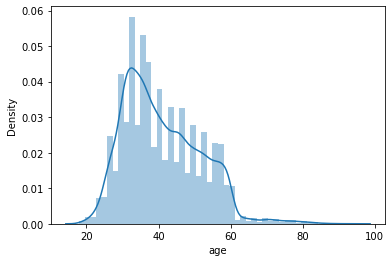

In [130]:
sns.distplot(df['age'])

- The above plot shows that age does not follow a normal distribution.


- Trying to convert into normal distribution form using the standard scalar method as follows:

In [131]:
df['age1']=(df['age']-np.round((df['age'].mean()),2))/np.round(df['age'].std(),2)

In [132]:
df['age'].describe()

count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [133]:
df['age'].std()

10.61692648316195

In [134]:
df['age1'].describe()

count    45211.000000
mean         0.000451
std          0.999711
min         -2.159134
25%         -0.746704
50%         -0.181733
75%          0.665725
max          5.091337
Name: age1, dtype: float64

<AxesSubplot:xlabel='age1', ylabel='Density'>

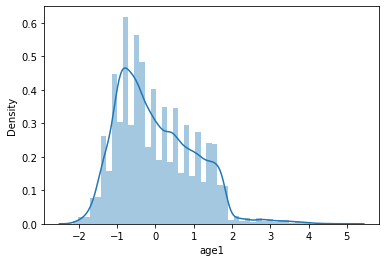

In [135]:
sns.distplot(df['age1'])

The curve is still not a normal curve. Trying log transformation

In [136]:
df['age_log']=np.log(df['age'])

<AxesSubplot:xlabel='age_log', ylabel='Density'>

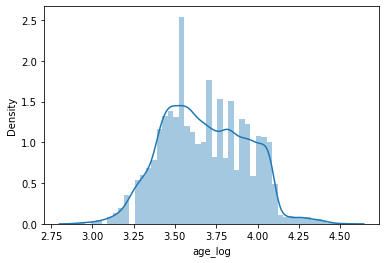

In [137]:
sns.distplot(df['age_log'])

<AxesSubplot:xlabel='age_sqrt', ylabel='Density'>

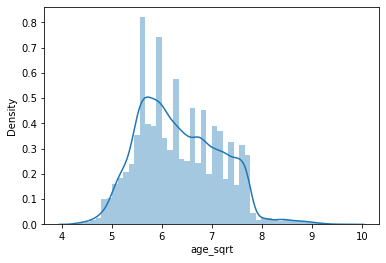

In [138]:
df['age_sqrt']=np.sqrt(df['age'])
sns.distplot(df['age_sqrt'])

*# Checking salary column*

In [139]:
df['salary'].describe()

count     45149.000000
mean      57084.453698
std       32038.075304
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary', ylabel='Density'>

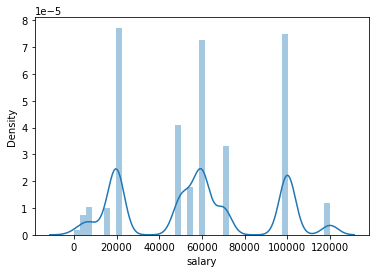

In [140]:
sns.distplot(df['salary'])

<AxesSubplot:xlabel='salary1', ylabel='Density'>

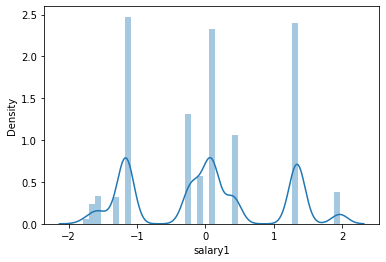

In [141]:
# Using standard scaler. [z=x-mu/sigma]

df['salary1']=(df['salary']-np.round((df['salary'].mean()),2))/np.round(df['salary'].std(),2)
sns.distplot(df['salary1'])

<AxesSubplot:xlabel='salary_sqrt', ylabel='Density'>

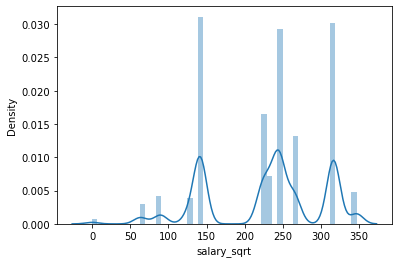

In [142]:
df['salary_sqrt']=np.sqrt(df['salary'])
sns.distplot(df['salary_sqrt'])

In [143]:
# For salary column:
mu=np.round(np.mean(df['salary']),3)
sigma=np.round(np.std(df['salary']),3)
print(mu,sigma)

57084.454 32037.72


In [145]:
# Checking outliers:
#df[df['salary'] < (mu-(2*sigma)) | df['salary'] > (mu+(2*sigma))]

***9.	Let’s check if we have any statistical patterns in the Data frame (using plots or analysis).***

In [ ]:
sns.barplot(df['response'],df['duration'])

- The above plot shows that call with longer duration have positive response from customers

In [ ]:
sns.barplot(df['marital'],df['duration'])

- The above plot shows that single customers have higher call durations

In [ ]:
sns.barplot(df['job'],df['duration'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows that customers who are students have longest call durations

In [ ]:
sns.lineplot(df['edu'],df['duration'])

- The above plot shows that customers with tertiary education have the longest calls

In [ ]:
sns.barplot(df['housing'],df['duration'])

- The above plot shows that customers with no housing have longer calls

In [ ]:
sns.barplot(df['loan'],df['duration'])

- The above plot shows that customers with no loan are having longer calls. 

In [ ]:
sns.boxplot(df['edu'],df['duration'])

In [ ]:
sns.boxplot(df['edu'],df['salary'])

In [ ]:
sns.lineplot(df['job'],df['salary'])
plt.xticks(rotation=90)
plt.show()

<h1 style='color:blue'> Final Conclusions </H1>

- The response of the calls are highly dependent on the call duration. 
- The longer the call, the more positive responses observed. General trend.
- Longest call duration are for customers who are :
        - single (marital status)
        - student (job role)
        - education (tertiary)
        - No house
        - No loan
      
**- Thus it is best to focus the marketing calls on the customers with the above features as a customer who is single, student, has tertiary education, has no loan and no house will be more inclined towards the term deposit**